In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import TreeSearch
from pgmpy.estimators import MaximumLikelihoodEstimator


ModuleNotFoundError: No module named 'pgmpy'

In [5]:
pip install pgmpy


  Using cached pgmpy-0.1.26-py3-none-any.whl (2.0 MB)
  Using cached xgboost-2.1.2-py3-none-manylinux_2_28_x86_64.whl (153.9 MB)
  Using cached torch-2.5.1-cp39-cp39-manylinux1_x86_64.whl (906.5 MB)
  Using cached google_generativeai-0.8.3-py3-none-any.whl (160 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached pydantic-2.9.2-py3-none-any.whl (434 kB)
  Using cached google_api_python_client-2.149.0-py2.py3-none-any.whl (12.3 MB)
  Using cached google_ai_generativelanguage-0.6.10-py3-none-any.whl (760 kB)
  Using cached google_auth-2.35.0-py2.py3-none-any.whl (208 kB)
  Using cached google_api_core-2.22.0-py3-none-any.whl (156 kB)
  Using cached protobuf-5.28.3-cp38-abi3-manylinux2014_x86_64.whl (316 kB)
  Using cached proto_plus-1.25.0-py3-none-any.whl (50 kB)
  Using cached googleapis_common_protos-1.65.0-py2.py3-none-any.whl (220 kB)
  Using cached grpcio_status-1.67.1-py3-none-any.whl (14 kB)
  Using cached grpcio-1.67.1-cp39-cp39-manylinux_2_17_x86_64.manyl

In [3]:
# 1. Cargar los datos
data = pd.read_csv('~/cursos/mkp/resultados/flei/flei.csv')
df.drop(columnas = ['smoker'])

In [ ]:
# 2. Aprender la estructura de la red usando el algoritmo de Chow-Liu
# El algoritmo usa información mutua para encontrar la estructura de árbol óptima
estimator = TreeSearch(data)
model = estimator.estimate(estimator_type="chow-liu", class_node="f")

# 3. Ajustar la red con los datos
model.fit(data, estimator=MaximumLikelihoodEstimator)

# 4. Visualizar la red
G = model.to_networkx()
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Distribución de nodos
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=10, font_weight='bold')
plt.title("Estructura de la Red Gaussiana Aprendida")
plt.show()

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch, BicScore
import matplotlib.pyplot as plt
import networkx as nx


In [7]:
import pandas as pd


In [10]:
# Cargar el archivo CSV
data = pd.read_csv('~/cursos/mkp/resultados/flei/flei.csv')

# Selección de las columnas de entrada y la clase
input_vars = [f'x{i}' for i in range(1, 21)]
class_var = 'f'


,n,x,y,f,obj,rel,x1,x2,x3,x4,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,1,1,1,1,245,0.115,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,1,177,0.083,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2,2,1,422,0.197,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,2,1,291,0.136,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,3,1,536,0.251,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048571,1048572,5,1024,0,3599,1.683,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
1048572,1048573,4,1024,0,3844,1.797,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
1048573,1048574,3,1024,0,3776,1.765,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1048574,1048575,2,1024,0,4021,1.880,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [ ]:

# Definir el objeto de búsqueda para aprender la estructura
hc = HillClimbSearch(df[input_vars + [class_var]])
best_model = hc.estimate(scoring_method=BicScore(df))

# Crear la red bayesiana
model = BayesianNetwork(best_model.edges())
model.fit(df[input_vars + [class_var]])

In [ ]:
# Dibujar la estructura de la red
plt.figure(figsize=(10, 8))
nx.draw(model, with_labels=True, node_size=2000, node_color="skyblue", font_size=12, font_weight="bold", edge_color='gray')
plt.show()

# Con arbol

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('~/cursos/mkp/resultados/flei/flei.csv')

# Selección de las columnas de entrada y la clase
input_vars = [f'x{i}' for i in range(1, 21)]
X = df[input_vars]
y = df['f']

In [2]:
X

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048571,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1048572,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1048573,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1048574,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [3]:
y

0          1
1          1
2          1
3          1
4          1
          ..
1048571    0
1048572    0
1048573    0
1048574    0
1048575    1
Name: f, Length: 1048576, dtype: int64

In [36]:
# Crear y entrenar el modelo con configuraciones ajustadas
modelo_arbol = DecisionTreeClassifier(
    max_depth=30,            # Ajusta este valor para permitir mayor profundidad si fuera necesario
    min_samples_split=30,    # Ajusta el tamaño mínimo para crear divisiones
    criterion="entropy",     # Prueba con "entropy" en lugar de "gini"
    random_state=42
)
modelo_arbol.fit(X, y)



DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=30,
                       random_state=42)

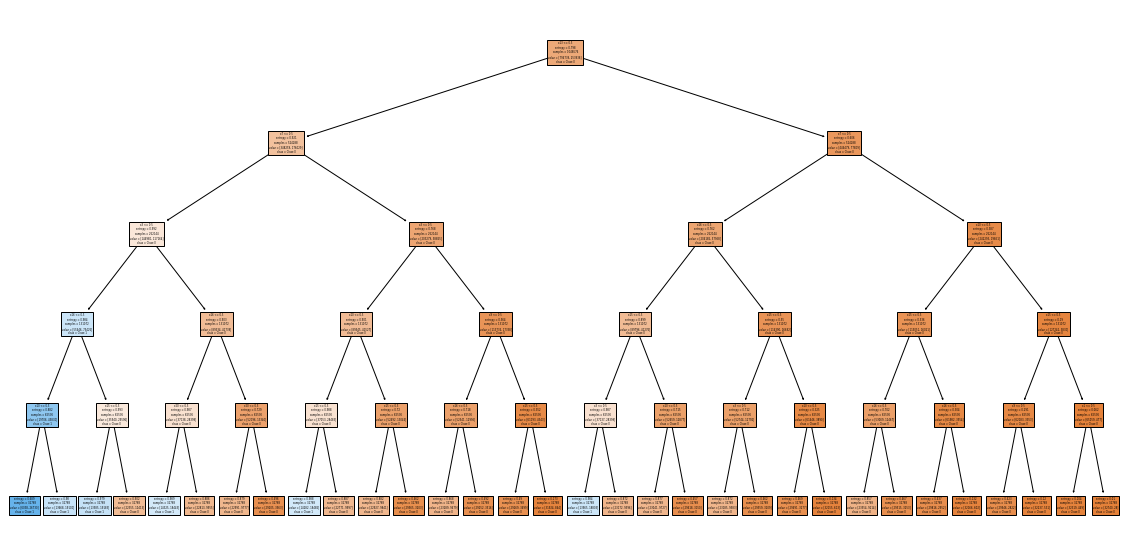

In [21]:
# Graficar el árbol de decisión ajustado
plt.figure(figsize=(20, 10))
plot_tree(
    modelo_arbol,
    feature_names=X.columns,
    class_names=["Clase 0", "Clase 1"],
    filled=True
)
plt.show()

In [37]:
from sklearn.metrics import classification_report

# 1. Predecir las clases usando el modelo entrenado
y_pred = modelo_arbol.predict(X)

# 2. Generar el reporte de clasificación
reporte = classification_report(y, y_pred, target_names=["Clase 0", "Clase 1"])

# 3. Mostrar el reporte
print("Reporte de clasificación por clases:")
print(reporte)


Reporte de clasificación por clases:
              precision    recall  f1-score   support

     Clase 0       0.96      0.97      0.97    794738
     Clase 1       0.91      0.89      0.90    253838

    accuracy                           0.95   1048576
   macro avg       0.94      0.93      0.93   1048576
weighted avg       0.95      0.95      0.95   1048576



In [8]:
# Importar las librerías necesarias
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
import networkx as nx
import matplotlib.pyplot as plt

# Asegurando que X esté en formato DataFrame y sin la columna objetivo y (si está en X)
# si y está en X, eliminarlo: X = X.drop(columns=['f']) 

# 1. Crear la red bayesiana utilizando un método de aprendizaje estructural (Hill Climbing)
hc = HillClimbSearch(X)  # Define la búsqueda Hill Climbing para aprender la estructura
model = hc.estimate(scoring_method=BicScore(X))  # Estima el modelo usando BicScore

# 2. Visualizar la estructura de la red
plt.figure(figsize=(15, 10))
graph = nx.DiGraph(model.edges())  # Crear un gráfico dirigido a partir de las aristas del modelo
pos = nx.spring_layout(graph)  # Definir la disposición de los nodos en la visualización
nx.draw(graph, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=10, font_weight="bold", edge_color="gray", arrowsize=15)
plt.title("Estructura de la Red Bayesiana")
plt.show()


AttributeError: module 'torch' has no attribute 'optim'

In [19]:
pip install bnlearn --no-deps

  Using cached bnlearn-0.10.2-py3-none-any.whl (83 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Importar librerías necesarias
import bnlearn as bn
import pandas as pd

# Asegurarse de que 'X' esté en formato DataFrame
# si 'y' está en 'X', elimínalo: X = X.drop(columns=['f'])

# 1. Entrenar la red bayesiana usando 'bnlearn'
model = bn.structure_learning.fit(X, methodtype='hc')  # Usa Hill Climbing para aprender la estructura

# 2. Visualizar la red bayesiana
bn.plot(model)


AttributeError: module 'torch' has no attribute 'optim'

In [6]:
pip install --upgrade pgmpy


  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached google_generativeai-0.8.3-py3-none-any.whl (160 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bnlearn 0.10.2 requires datazets, which is not installed.
bnlearn 0.10.2 requires df2onehot, which is not installed.
bnlearn 0.10.2 requires funcsigs, which is not installed.
bnlearn 0.10.2 requires ismember, which is not installed.
bnlearn 0.10.2 requires lingam, which is not installed.
bnlearn 0.10.2 requires pypickle, which is not installed.
bnlearn 0.10.2 requires python-louvain, which is not installed.
bnlearn 0.10.2 requires setgraphviz, which is not installed.
Note: you may need to restart the kernel to use updated packages.


Precisión: 1.00
Recall: 1.00
F1 Score: 1.00


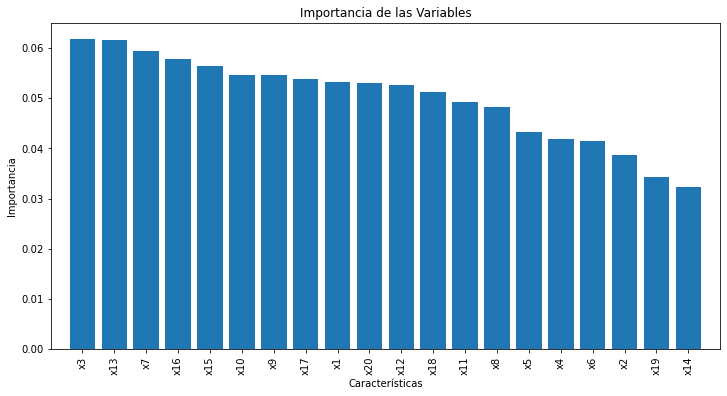

In [19]:
# Importar las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Crear y entrenar el modelo de Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100,        # Número de árboles en el bosque
    random_state=42
)
modelo_rf.fit(X, y)

# 2. Hacer predicciones
y_pred = modelo_rf.predict(X)

# 3. Calcular las métricas de evaluación
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

# Imprimir las métricas
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# 4. Importancia de las variables
importancia = modelo_rf.feature_importances_

# Graficar la importancia de las variables
indices = np.argsort(importancia)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Importancia de las Variables")
plt.bar(range(X.shape[1]), importancia[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()


Precisión: 0.93
Recall: 0.85
F1 Score: 0.89


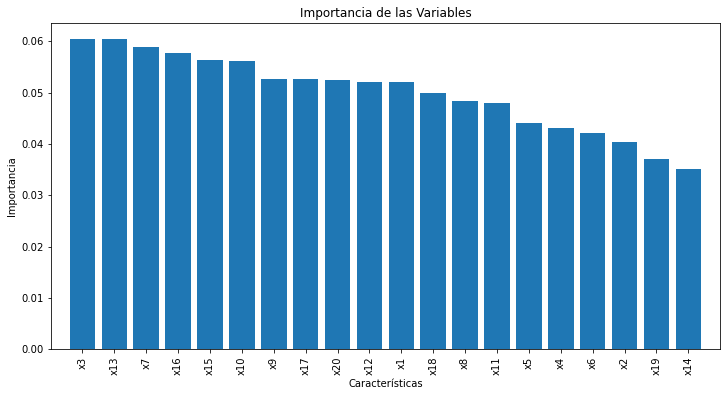

In [39]:
# Importar las librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 1. Dividir los datos en conjunto de entrenamiento y prueba (50% - 50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# 2. Crear y entrenar el modelo de Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100,        # Número de árboles en el bosque
    random_state=42
)
modelo_rf.fit(X_train, y_train)

# 3. Hacer predicciones en el conjunto de prueba
y_pred = modelo_rf.predict(X_test)

# 4. Calcular las métricas de evaluación
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# 5. Importancia de las variables
importancia = modelo_rf.feature_importances_

# Graficar la importancia de las variables
indices = np.argsort(importancia)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Importancia de las Variables")
plt.bar(range(X.shape[1]), importancia[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importancia")
plt.xlabel("Características")
plt.show()
